In [1]:
import numpy as np
import os
import tarfile
from six.moves import urllib
import pandas as pd

workData = "https://raw.githubusercontent.com/Web-Cam/MachineLearningProject/master/Absenteeism_at_work.csv"
dataset = pd.read_csv(workData)

In [20]:
from sklearn import model_selection
array = dataset.values

X = np.c_[dataset["ID"]]
Y = np.c_[dataset["Month of absence"]]
test_size = 0.20
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size)

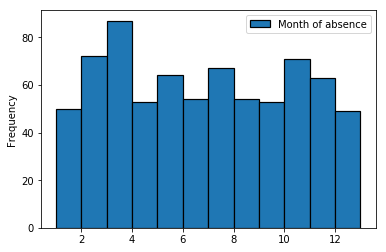

In [59]:
import matplotlib.pyplot as plt
dataset.plot(kind = 'hist',y= "Month of absence",histtype="bar",edgecolor='black', linewidth=1.2,bins=range(1,14))
plt.show()

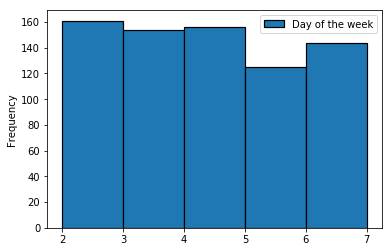

In [52]:
dataset.plot(kind = 'hist',y= "Day of the week",bins=range(2,8),edgecolor='black', linewidth=1.2)
plt.show()

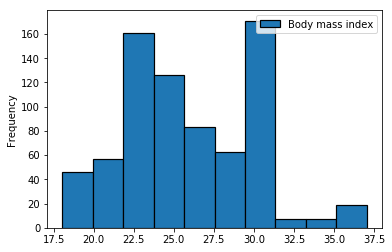

In [64]:
dataset.plot(kind = 'hist',y= "Body mass index",edgecolor='black', linewidth=1.2,align='left')
plt.show()